<a href="https://colab.research.google.com/github/thatguyandy27/DLWithPython/blob/main/chapter8/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the code from kaggle.

In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:24<00:00, 35.1MB/s]
100% 812M/812M [00:24<00:00, 35.0MB/s]


In [3]:
!unzip -qq dogs-vs-cats.zip

In [4]:
!unzip -qq train.zip

Splitting the images into datasets

In [5]:
import os, shutil, pathlib

In [6]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [7]:
def make_subset(subset_name, start_index, end_index):
  # for cat and dog
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    # filename is cat/dog.number.jpg
    fnames = [f"{category}.{i}.jpg"
              for i in range(start_index, end_index)]
    
    # for each file copy 
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir / fname)

  


In [8]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

Building the model.  Data is in train/test/validation folders under cat/dog folders.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

import matplotlib.pyplot as plt

In [ ]:
inputs = keras.Input(shape= (180, 180, 3))
x = layers.Rescaling(1. / 255.)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [13]:
train_dataset = image_dataset_from_directory( new_base_dir / "train", image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory( new_base_dir / "validation", image_size=(180, 180), batch_size= 32)
test_dataset = image_dataset_from_directory( new_base_dir / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# check shape
for data_batch, labels_batch in train_dataset:
  print("data batch shape: ", data_batch.shape)
  print("labels batch shape: ", labels_batch.shape)
  break

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [ ]:
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 5s 71ms/step - loss: 0.7112 - accuracy: 0.5220 - val_loss: 0.6915 - val_accuracy: 0.5870
Epoch 2/30
63/63 [==============================] - 5s 69ms/step - loss: 0.7184 - accuracy: 0.5560 - val_loss: 0.6802 - val_accuracy: 0.6270
Epoch 3/30
63/63 [==============================] - 5s 69ms/step - loss: 0.6740 - accuracy: 0.6055 - val_loss: 0.6647 - val_accuracy: 0.5880
Epoch 4/30
63/63 [==============================] - 5s 68ms/step - loss: 0.6496 - accuracy: 0.6325 - val_loss: 0.6733 - val_accuracy: 0.5940
Epoch 5/30
63/63 [==============================] - 5s 69ms/step - loss: 0.6137 - accuracy: 0.6770 - val_loss: 0.6213 - val_accuracy: 0.6550
Epoch 6/30
63/63 [==============================] - 5s 68ms/step - loss: 0.5801 - accuracy: 0.6970 - val_loss: 0.5900 - val_accuracy: 0.6880
Epoch 7/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5482 - accuracy: 0.7300 - val_loss: 0.5732 - val_accuracy: 0.7020
Epoch 8/30
63

In [ ]:
!pwd

/content


In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)


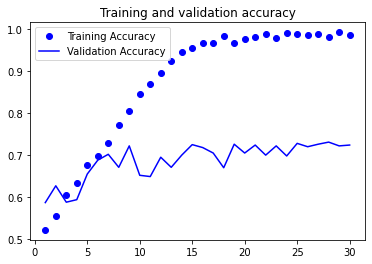

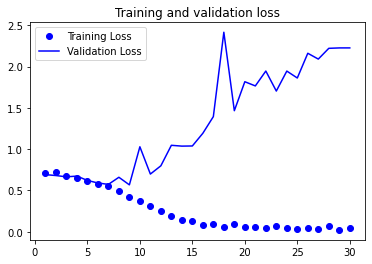

In [ ]:
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [ ]:
#test accuracy
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_accuracy = test_model.evaluate(test_dataset)


63/63 [==============================] - 3s 36ms/step - loss: 0.5957 - accuracy: 0.6985
Test accuracy: (test_acc:.3f)


In [ ]:
print(f"Test accuracy: {test_accuracy:.3f}")

Test accuracy: 0.698


Data Augmentation

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

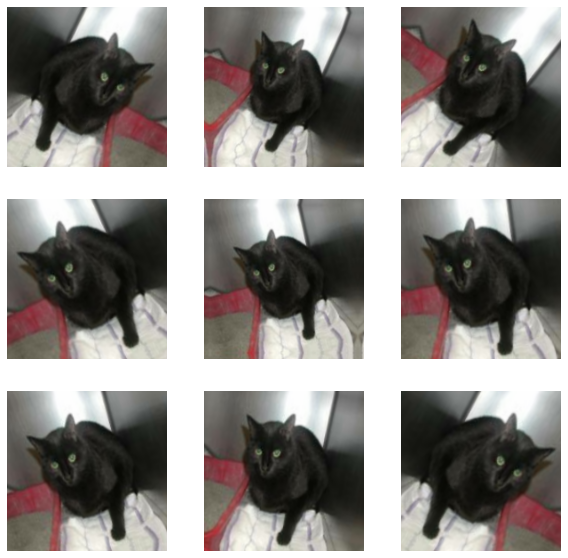

In [ ]:
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
inputs = keras.Input(shape= (180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1. / 255.)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "convnet_from_scratch_with_autmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [ ]:
history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 6s 73ms/step - loss: 0.7189 - accuracy: 0.5405 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 5s 73ms/step - loss: 0.6915 - accuracy: 0.5580 - val_loss: 0.6867 - val_accuracy: 0.5370
Epoch 3/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6766 - accuracy: 0.6035 - val_loss: 0.6923 - val_accuracy: 0.5270
Epoch 4/100
63/63 [==============================] - 5s 73ms/step - loss: 0.6617 - accuracy: 0.6100 - val_loss: 0.6494 - val_accuracy: 0.6100
Epoch 5/100
63/63 [==============================] - 5s 71ms/step - loss: 0.6537 - accuracy: 0.6485 - val_loss: 0.6274 - val_accuracy: 0.6300
Epoch 6/100
63/63 [==============================] - 5s 71ms/step - loss: 0.6176 - accuracy: 0.6670 - val_loss: 0.5995 - val_accuracy: 0.6670
Epoch 7/100
63/63 [==============================] - 5s 72ms/step - loss: 0.6141 - accuracy: 0.6760 - val_loss: 0.6183 - val_accuracy: 0.6350
Epoch 

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)


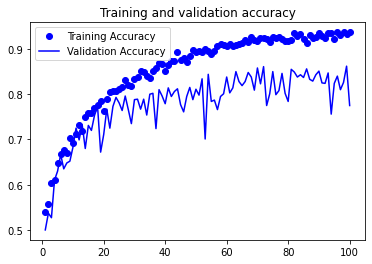

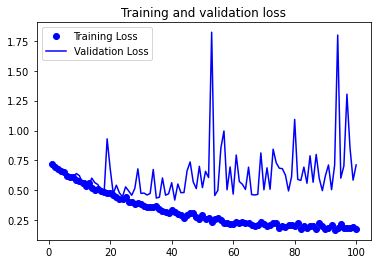

In [ ]:
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [ ]:
#test accuracy
test_model = keras.models.load_model("convnet_from_scratch_with_autmentation.keras")
test_loss, test_accuracy = test_model.evaluate(test_dataset)


63/63 [==============================] - 3s 36ms/step - loss: 0.4475 - accuracy: 0.8225


In [ ]:
print(f"Test accuracy: {test_accuracy:.3f}")

Test accuracy: 0.822


VGG16 Pretrained

In [15]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

58900480/58889256 [==============================] - 0s 0us/step


In [16]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [17]:
import numpy as np 

In [18]:
def get_features_and_labels(dataset):
  all_features=[]
  all_labels=[]
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  
  return np.concatenate(all_features), np.concatenate(all_labels)


In [19]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [24]:
inputs = keras.Input(shape=train_features.shape[1:])
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [25]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

callbacks = [ keras.callbacks.ModelCheckpoint(filepath="feature_extraction.keras", save_best_only=True, monitor="val_loss")]

In [26]:
history = model.fit(train_features, train_labels, epochs=20, validation_data=(val_features, val_labels), callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 13ms/step - loss: 18.2440 - accuracy: 0.9205 - val_loss: 5.9780 - val_accuracy: 0.9620
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 3.3863 - accuracy: 0.9750 - val_loss: 13.2478 - val_accuracy: 0.9470
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.9035 - accuracy: 0.9810 - val_loss: 9.3377 - val_accuracy: 0.9590
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3654 - accuracy: 0.9900 - val_loss: 6.8806 - val_accuracy: 0.9680
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9213 - accuracy: 0.9910 - val_loss: 11.5846 - val_accuracy: 0.9540
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.2573 - accuracy: 0.9975 - val_loss: 3.8874 - val_accuracy: 0.9800
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.4593 - accuracy: 0.9965 - val_loss: 4.5697 - val_accuracy: 0.9780
Epoch 8/20
63/63

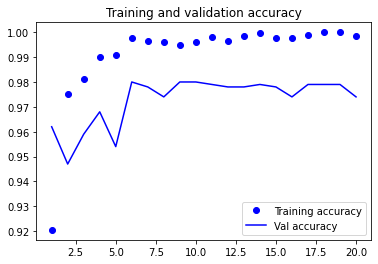

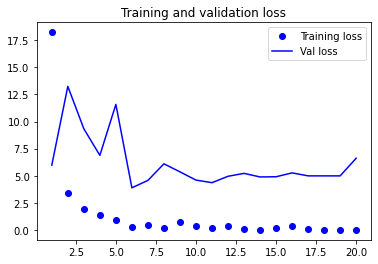

In [28]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Val accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Using VGG16 while freezing the layers

In [29]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False)
conv_base.trainable = False

In [31]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(.1),
    layers.RandomZoom(.2),
])

In [32]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [33]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [34]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint(filepath = "feature_extraction_with_data_augmentation.keras", save_best_only=True, monitor="val_loss")
]

In [35]:
history = model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 14s 187ms/step - loss: 20.2335 - accuracy: 0.8955 - val_loss: 4.9361 - val_accuracy: 0.9630
Epoch 2/50
63/63 [==============================] - 12s 185ms/step - loss: 6.9376 - accuracy: 0.9450 - val_loss: 5.3478 - val_accuracy: 0.9660
Epoch 3/50
63/63 [==============================] - 12s 192ms/step - loss: 6.4136 - accuracy: 0.9520 - val_loss: 3.6203 - val_accuracy: 0.9720
Epoch 4/50
63/63 [==============================] - 12s 192ms/step - loss: 4.3021 - accuracy: 0.9605 - val_loss: 6.6243 - val_accuracy: 0.9580
Epoch 5/50
63/63 [==============================] - 13s 199ms/step - loss: 4.1730 - accuracy: 0.9690 - val_loss: 3.5901 - val_accuracy: 0.9740
Epoch 6/50
63/63 [==============================] - 12s 190ms/step - loss: 3.1223 - accuracy: 0.9685 - val_loss: 4.4302 - val_accuracy: 0.9770
Epoch 7/50
63/63 [==============================] - 12s 193ms/step - loss: 4.0472 - accuracy: 0.9660 - val_loss: 3.6760 - val_accuracy: 0.972

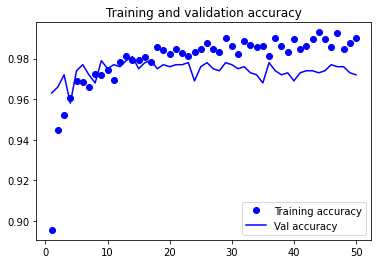

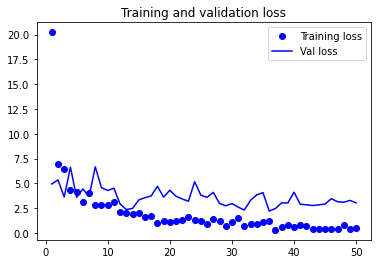

In [36]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Val accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [37]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 116ms/step - loss: 2.2343 - accuracy: 0.9750
Test accuracy: 0.975


Fine tuning model

In [38]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False


In [39]:
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), metrics=["accuracy"])

In [40]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="fine_tuning.keras", save_best_only=True, monitor="val_loss")]
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 209ms/step - loss: 0.5330 - accuracy: 0.9900 - val_loss: 3.1466 - val_accuracy: 0.9750
Epoch 2/30
63/63 [==============================] - 14s 213ms/step - loss: 0.4788 - accuracy: 0.9895 - val_loss: 2.2327 - val_accuracy: 0.9750
Epoch 3/30
63/63 [==============================] - 14s 213ms/step - loss: 0.4089 - accuracy: 0.9920 - val_loss: 2.3447 - val_accuracy: 0.9770
Epoch 4/30
63/63 [==============================] - 14s 215ms/step - loss: 0.5749 - accuracy: 0.9890 - val_loss: 2.0515 - val_accuracy: 0.9790
Epoch 5/30
63/63 [==============================] - 14s 214ms/step - loss: 0.1687 - accuracy: 0.9955 - val_loss: 1.9622 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 14s 213ms/step - loss: 0.4333 - accuracy: 0.9915 - val_loss: 1.9478 - val_accuracy: 0.9770
Epoch 7/30
63/63 [==============================] - 13s 209ms/step - loss: 0.3853 - accuracy: 0.9900 - val_loss: 2.0049 - val_accuracy: 0.9780

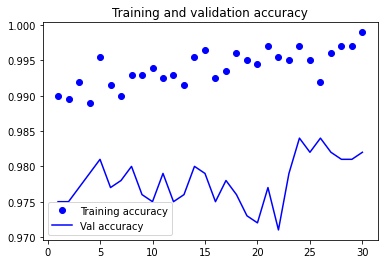

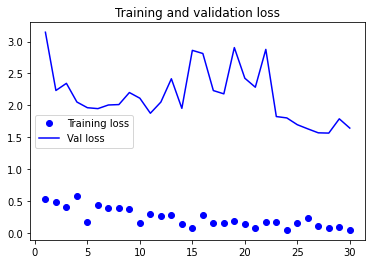

In [41]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Val accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [42]:
test_model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 116ms/step - loss: 1.8768 - accuracy: 0.9775
Test accuracy: 0.978
